In [30]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import medfilt

In [97]:
def imshow(img, gray=True):
    plt.imshow(img, cmap="gray")
    plt.show()
    print()

In [98]:
def draw_rectangle(img, i1, i2, j1, j2):
    img_copy = np.copy(img)
    img_copy[i1:(i1+5),j1:j2,:] = [0,0,255]
    img_copy[i2:(i2+5),j1:j2,:] = [0,0,255]
    img_copy[i1:i2,j1:(j1+5),:] = [0,0,255]
    img_copy[i1:i2,j2:(j2+5),:] = [0,0,255]
    imshow(img_copy)

In [122]:
def preprocess(img, kernel_size=7, threshold=70):
    img = medfilt(img, kernel_size)
    return 255*(img >= threshold)

In [135]:
files = ["nasa1.png", "nasa2.jpeg", "nasa3.jpg", "nasa4.jpg"]
crops = [[350, 640, 130, 1060],
         [290, 490, 535, 800],
         [85, 215, 40, 410],
         [190, 970, 560, 820]]

---- Preprocessing nasa1.png ----

Actual image


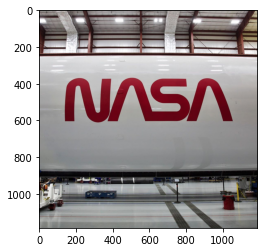


Selected area


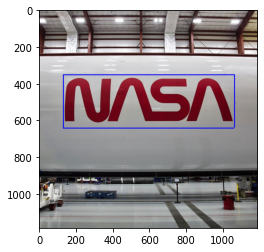


Cropped area


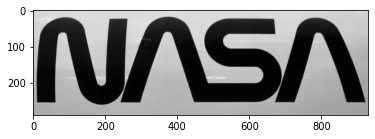


Processed image


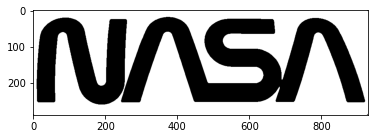


---- Preprocessing nasa2.jpeg ----

Actual image


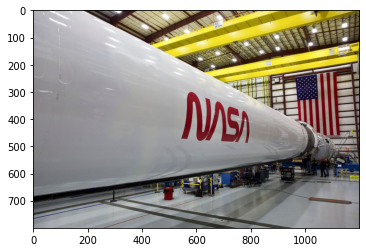


Selected area


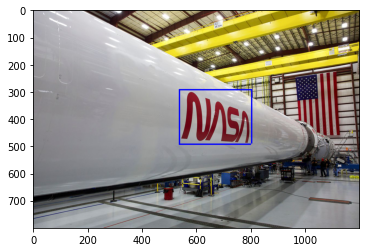


Cropped area


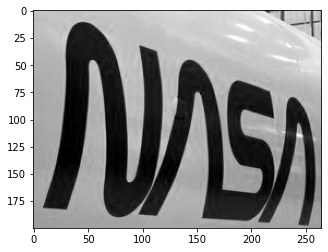


Processed image


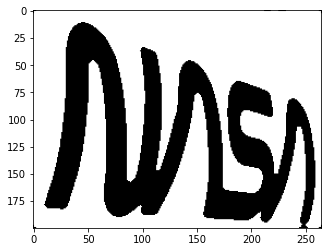


---- Preprocessing nasa3.jpg ----

Actual image


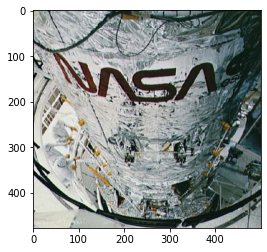


Selected area


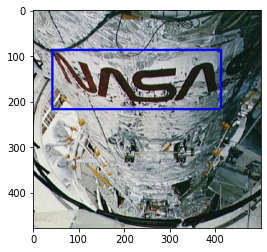


Cropped area


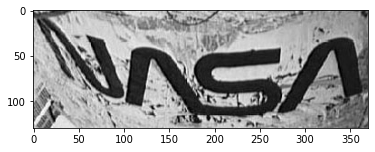


Processed image


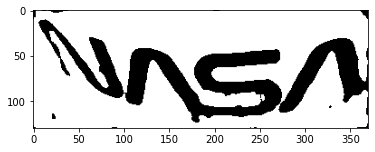


---- Preprocessing nasa4.jpg ----

Actual image


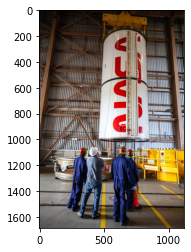


Selected area


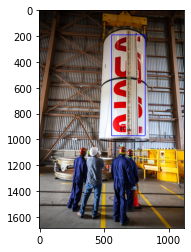


Cropped area


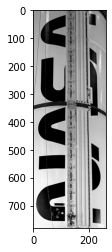


Processed image


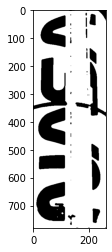

In [136]:
for file, crop in zip(files, crops):
    print(f"---- Preprocessing {file} ----\n")
    
    nasa = np.array(Image.open(file))
    print("Actual image")
    imshow(nasa)
    
    print("Selected area")
    draw_rectangle(nasa, *crop)
    
    red_channel_crop = nasa[crop[0]:crop[1],crop[2]:crop[3],1]
    print("Cropped area")
    imshow(red_channel_crop)
    
    A = preprocess(red_channel_crop)
    print("Processed image")
    imshow(A)
    im = Image.fromarray(np.uint8(A))
    im.save(f"preprocess_{file}")